In [72]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
%matplotlib inline

In [73]:
reliance = 'RELIANCE.NS'
tatamotors = 'TATAMOTORS.NS'
ms = 'MSFT'
apple = 'AAPL'
nokia = 'NOK'
google = 'GOOG'
tcs = 'TCS.NS'
ongc = 'ONGC.NS'
ntpc = 'NTPC.NS'

reliance_data = yf.download(reliance, start = '2024-01-01', end = '2024-04-30')

tata_data = yf.download(tatamotors, start = '2024-01-01', end = '2024-04-30')

ms_data = yf.download(ms, start = '2024-01-01', end = '2024-04-30')

apple_data = yf.download(apple, start = '2024-01-01', end = '2024-04-30')

nokia_data = yf.download(nokia, start = '2024-01-01', end = '2024-04-30')

google_data = yf.download(google, start = '2024-01-01', end = '2024-04-30')

tcs_data = yf.download(tcs, start = '2024-01-01', end = '2024-04-30')

ongc_data = yf.download(ongc, start = '2024-01-01', end = '2024-04-30')

ntpc_data = yf.download(ntpc, start = '2024-01-01', end = '2024-04-30')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [74]:
reliance_data.to_csv(f'reliance_data.csv')
tata_data.to_csv(f'tata-data.csv')
ms_data.to_csv(f'ms-data.csv')
apple_data.to_csv(f'apple-data.csv')
nokia_data.to_csv(f'nokia-data.csv')
google_data.to_csv(f'google-data.csv')
tcs_data.to_csv(f'tcs-data.csv')
ongc_data.to_csv(f'ongc-data.csv')
ntpc_data.to_csv(f'ntpc-data.csv')

## Predicting prices using GEOMETRIC BROWNIAN MOTION model

### LARGECAP COMPANIES

#### RELIANCE

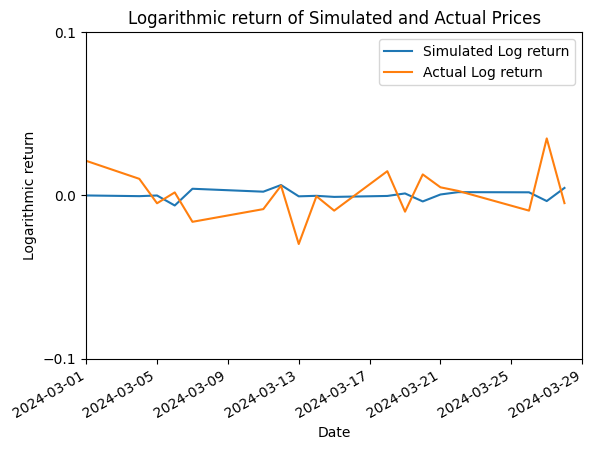

In [75]:
import numpy.random as npr

#opening the csv data
rel = pd.read_csv('reliance_data.csv')
rel['Date'] = pd.to_datetime(rel['Date'])
rel.set_index('Date', inplace=True)
rel['Log_Ret'] = np.log(rel['Close'] / rel['Close'].shift(1))
rel['Volatility'] = rel['Log_Ret'].rolling(window=10).std() * np.sqrt(252)
#sampling the data
rel1 = rel['2024-03-01':'2024-03-31']

#defining variables
T = 1/252  #maturity time
M = len(rel1)-1 #time steps
r = float(np.mean(rel1['Log_Ret'])) #drift of the data
dt = T/M   #length of time interval
I = 1  #number of paths

S0 = round(float(rel1['Close'].iloc[0]),2)
S = np.zeros((M + 1, I))  # 2D array to store stock price for each path at each time step
S[0] = S0  # Set initial price for all paths
mean_sigma = round(float(np.mean(rel1['Volatility']['2024-01-01':'2024-03-01'])),2)
sigma = mean_sigma
#simulation loop
for t in range(1, M + 1):
    #computing volatility on simulated prices
        
    # Generate random numbers for all paths at time t
    Z = npr.standard_normal(I)
    # Update S[t] for all paths at time t
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)

#making comparison table that includes MAPE
S = S.flatten()
rel_comp = pd.DataFrame({
    'Simulated Price': S,
    'Actual Price': rel1['Close'].values
})

rel_comp['MAPE'] = (np.absolute(rel_comp['Actual Price']-rel_comp['Simulated Price'])/rel_comp['Actual Price'])*100
rel_comp = rel_comp.round(2).set_index(rel1.index)

#plotting log return of simulated and actual price
rel_log_comp = pd.DataFrame({
    'Simulated Price' : S,
    'Simulated Log return': np.log(rel_comp['Simulated Price']/(rel_comp['Simulated Price'].shift(1))),
    'Actual Price' : rel1['Close'].values,
    'Actual Log return': rel1['Log_Ret'].values
}, index = rel1.index)
rel_log_comp = rel_log_comp.fillna(0)

rel_log_comp[['Simulated Log return','Actual Log return']].plot(yticks = [-0.1,0,0.1], 
                                                                xlabel = 'Date', 
                                                                ylabel = 'Logarithmic return', 
                                                                title = 'Logarithmic return of Simulated and Actual Prices', 
                                                                style = {'Fontsize':'25','Font':'Times New Roman'}).set_xlim(rel_log_comp.index[0],'2024-03-29')
plt.savefig('/Users/mpune/OneDrive/Desktop/gbm-sim/rel_log_ret.png',dpi=500,bbox_inches = 'tight')

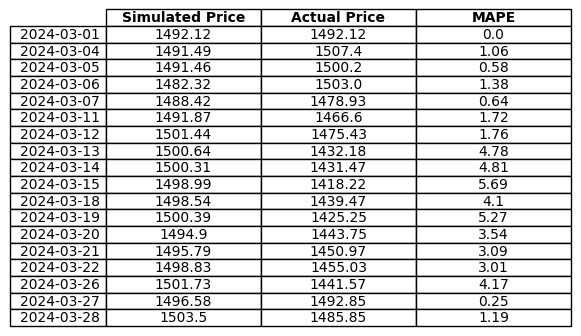

In [76]:
## Making the comparison table
# Convert index to just date without time
rel_comp.index = pd.to_datetime(rel_comp.index).date

# Rename the index to "Date"
rel_comp.index.name = 'Date'

# Create a plot for the table
fig, ax = plt.subplots(figsize=(6, 2))  # Adjust size as needed
ax.axis("tight")
ax.axis("off")

# Create a table plot with bold column headers
table_plot = ax.table(cellText=rel_comp.values,
                      colLabels=rel_comp.columns,
                      rowLabels=rel_comp.index,
                      cellLoc='center',
                      loc='center')

# Adjusting cell text properties to make headers bold
for (i, j), cell in table_plot.get_celld().items():
    if i == 0:  # Header row
        cell.set_text_props(weight='bold')  # Make header bold

# Saving as image
plt.savefig('/Users/mpune/OneDrive/Desktop/gbm-sim/rel_comp.png', dpi=300, bbox_inches='tight')

#### TCS

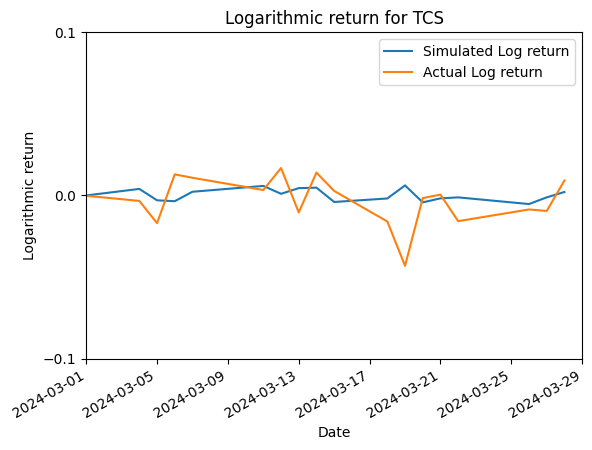

In [77]:
tcs = pd.read_csv('tcs-data.csv')
tcs['Log_Ret'] = np.log(tcs['Close']/tcs['Close'].shift(1))
tcs['Volatility'] = (tcs['Log_Ret'].rolling(window=10).std())*np.sqrt(252)

tcs['Date'] = pd.to_datetime(tcs['Date'])
tcs.set_index('Date', inplace=True)


#sampling the data
tcs1 = tcs['2024-03-01':'2024-03-31']
# len(tcs1)
tcs1['2024-03-01':'2024-03-31']

#ROI on stocks
returns = [(i+1 - i)/i for i in tcs1['Close']]
#defining variables
T = 1/252  #maturity time
M = len(tcs1)-1 #time steps
r = float(np.mean(tcs['Log_Ret'])) #drift of the data
dt = T/M   #length of time interval
I = 1  #number of paths

S0 = round(float(tcs1['Close'].iloc[0]),2)
S = np.zeros((M + 1, I))  # 2D array to store stock price for each path at each time step
S[0] = S0  # Set initial price for all paths
mean_sigma = round(float(np.mean(tcs1['Volatility']['2024-01-01':'2024-03-01'])),2)
sigma = mean_sigma
#simulation loop
for t in range(1, M + 1):
    #computing volatility on simulated prices
        
    # Generate random numbers for all paths at time t
    Z = npr.standard_normal(I)
    # Update S[t] for all paths at time t
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)

#setting comparison table
S = S.flatten()
tcs_comp = pd.DataFrame({
    'Simulated Price': S,
    'Actual Price': tcs1['Close'].values
})
tcs_comp['MAPE'] = (np.absolute(tcs_comp['Actual Price']-tcs_comp['Simulated Price'])/tcs_comp['Actual Price'])*100
tcs_comp = tcs_comp.round(2).set_index(tcs1.index)

#comparing logarithmic return
tcs_log_comp = pd.DataFrame({
    'Simulated Price' : S,
    'Simulated Log return': np.log(tcs_comp['Simulated Price']/(tcs_comp['Simulated Price'].shift(1))),
    'Actual Price' : tcs1['Close'].values,
    'Actual Log return': tcs1['Log_Ret'].values
}, index = tcs1.index)
tcs_log_comp = tcs_log_comp.fillna(0)

tcs_log_comp[['Simulated Log return','Actual Log return']].plot(yticks = [-0.1,0,0.1], 
                                                                xlabel = 'Date', 
                                                                ylabel = 'Logarithmic return', 
                                                                title = 'Logarithmic return for TCS', 
                                                                style = {'Fontsize':'25','Font':'Times New Roman'}).set_xlim(tcs_log_comp.index[0],'2024-03-29')
plt.savefig('/Users/mpune/OneDrive/Desktop/gbm-sim/tcs_log_ret.png',dpi=500,bbox_inches = 'tight')

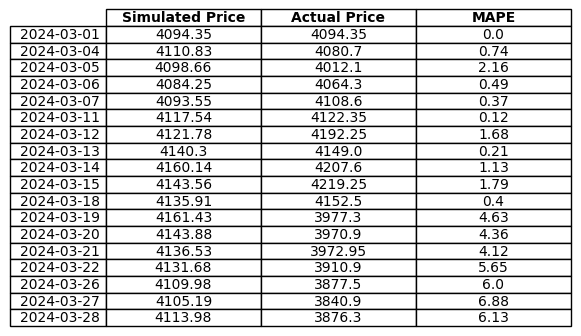

In [78]:
## Making the comparison table
# Convert index to just date without time
tcs_comp.index = pd.to_datetime(tcs_comp.index).date

# Rename the index to "Date"
tcs_comp.index.name = 'Date'

# Create a plot for the table
fig, ax = plt.subplots(figsize=(6, 2))  # Adjust size as needed
ax.axis("tight")
ax.axis("off")

# Create a table plot with bold column headers
table_plot = ax.table(cellText=tcs_comp.values,
                      colLabels=tcs_comp.columns,
                      rowLabels=tcs_comp.index,
                      cellLoc='center',
                      loc='center')

# Adjusting cell text properties to make headers bold
for (i, j), cell in table_plot.get_celld().items():
    if i == 0:  # Header row
        cell.set_text_props(weight='bold')  # Make header bold

# Saving as image
plt.savefig('/Users/mpune/OneDrive/Desktop/gbm-sim/tcs_comp.png', dpi=300, bbox_inches='tight')

#### ONGC

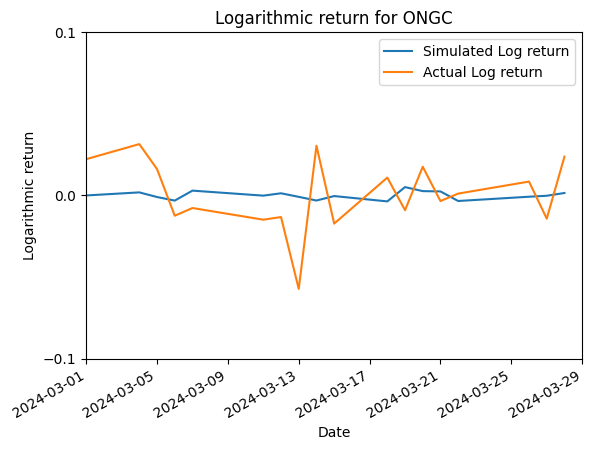

In [79]:
ongc = pd.read_csv('ongc-data.csv')
ongc['Log_Ret'] = np.log(ongc['Close']/ongc['Close'].shift(1))
ongc['Volatility'] = (ongc['Log_Ret'].rolling(window=10).std())*np.sqrt(252)

ongc['Date'] = pd.to_datetime(ongc['Date'])
ongc.set_index('Date', inplace=True)


#sampling the data
ongc1 = ongc['2024-03-01':'2024-03-31']
# len(ongc1)
ongc1['2024-03-01':'2024-03-31']

#ROI on stocks
returns = [(i+1 - i)/i for i in ongc1['Close']]
#defining variables
T = 1/252  #maturity time
M = len(ongc1)-1 #time steps
r = float(np.mean(ongc['Log_Ret'])) #drift of the data
dt = T/M   #length of time interval
I = 1  #number of paths

S0 = round(float(ongc1['Close'].iloc[0]),2)
S = np.zeros((M + 1, I))  # 2D array to store stock price for each path at each time step
S[0] = S0  # Set initial price for all paths
mean_sigma = round(float(np.mean(ongc1['Volatility']['2024-01-01':'2024-03-01'])),2)
sigma = mean_sigma
#simulation loop
for t in range(1, M + 1):
    #computing volatility on simulated prices
        
    # Generate random numbers for all paths at time t
    Z = npr.standard_normal(I)
    # Update S[t] for all paths at time t
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
#setting comparison table
S = S.flatten()
ongc_comp = pd.DataFrame({
    'Simulated Price': S,
    'Actual Price': ongc1['Close'].values
})
ongc_comp['MAPE'] = (np.absolute(ongc_comp['Actual Price']-ongc_comp['Simulated Price'])/ongc_comp['Actual Price'])*100
ongc_comp = ongc_comp.round(2).set_index(ongc1.index)

#plotting log return of simulated and actual price
ongc_log_comp = pd.DataFrame({
    'Simulated Price' : S,
    'Simulated Log return': np.log(ongc_comp['Simulated Price']/(ongc_comp['Simulated Price'].shift(1))),
    'Actual Price' : ongc1['Close'].values,
    'Actual Log return': ongc1['Log_Ret'].values
}, index = ongc1.index)
ongc_log_comp = ongc_log_comp.fillna(0)

ongc_log_comp[['Simulated Log return','Actual Log return']].plot(yticks = [-0.1,0,0.1], 
                                                                xlabel = 'Date', 
                                                                ylabel = 'Logarithmic return', 
                                                                title = 'Logarithmic return for ONGC', 
                                                                style = {'Fontsize':'25','Font':'Times New Roman'}).set_xlim(ongc_log_comp.index[0],'2024-03-29')
plt.savefig('/Users/mpune/OneDrive/Desktop/gbm-sim/ongc_log_ret.png',dpi=500,bbox_inches = 'tight')

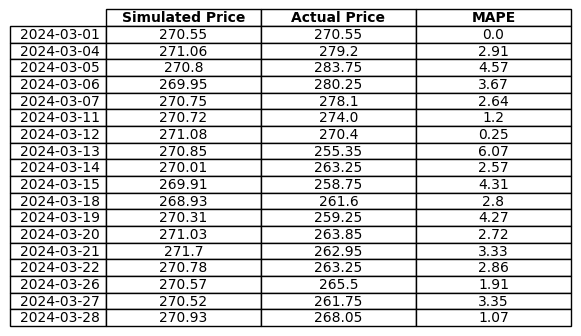

In [80]:
## Making the comparison table
# Convert index to just date without time
ongc_comp.index = pd.to_datetime(ongc_comp.index).date

# Rename the index to "Date"
ongc_comp.index.name = 'Date'

# Create a plot for the table
fig, ax = plt.subplots(figsize=(6, 2))  # Adjust size as needed
ax.axis("tight")
ax.axis("off")

# Create a table plot with bold column headers
table_plot = ax.table(cellText=ongc_comp.values,
                      colLabels=ongc_comp.columns,
                      rowLabels=ongc_comp.index,
                      cellLoc='center',
                      loc='center')

# Adjusting cell text properties to make headers bold
for (i, j), cell in table_plot.get_celld().items():
    if i == 0:  # Header row
        cell.set_text_props(weight='bold')  # Make header bold

# Saving as image
plt.savefig('/Users/mpune/OneDrive/Desktop/gbm-sim/ongc_comp.png', dpi=300, bbox_inches='tight')

#### NTPC

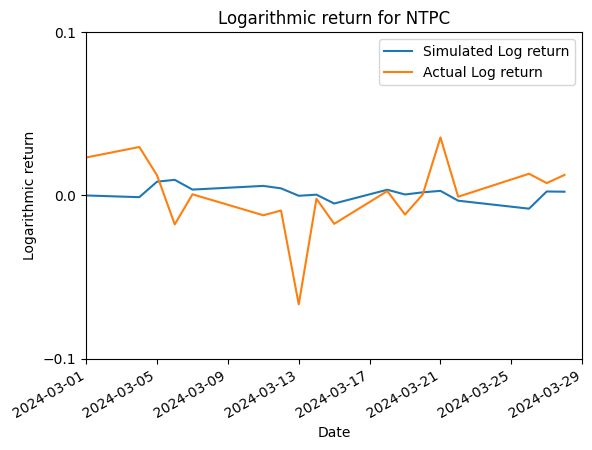

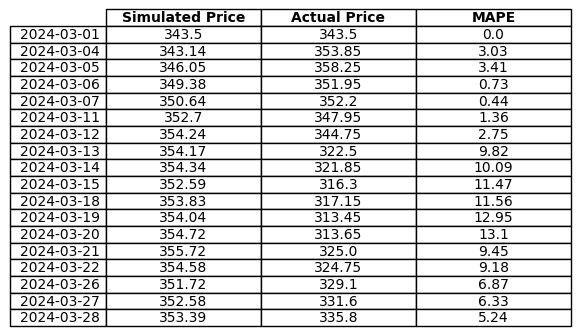

In [81]:
ntpc = pd.read_csv('ntpc-data.csv')
ntpc['Log_Ret'] = np.log(ntpc['Close']/ntpc['Close'].shift(1))
ntpc['Volatility'] = (ntpc['Log_Ret'].rolling(window=10).std())*np.sqrt(252)

ntpc['Date'] = pd.to_datetime(ntpc['Date'])
ntpc.set_index('Date', inplace=True)


#sampling the data
ntpc1 = ntpc['2024-03-01':'2024-03-31']
# len(ntpc1)
ntpc1['2024-03-01':'2024-03-31']

#ROI on stocks
returns = [(i+1 - i)/i for i in ntpc1['Close']]
#defining variables
T = 1/252  #maturity time
M = len(ntpc1)-1 #time steps
r = float(np.mean(ntpc['Log_Ret'])) #drift of the data
dt = T/M   #length of time interval
I = 1  #number of paths

S0 = round(float(ntpc1['Close'].iloc[0]),2)
S = np.zeros((M + 1, I))  # 2D array to store stock price for each path at each time step
S[0] = S0  # Set initial price for all paths
mean_sigma = round(float(np.mean(ntpc1['Volatility']['2024-01-01':'2024-03-01'])),2)
sigma = mean_sigma
#simulation loop
for t in range(1, M + 1):
    #computing volatility on simulated prices
        
    # Generate random numbers for all paths at time t
    Z = npr.standard_normal(I)
    # Update S[t] for all paths at time t
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
#setting comparison table
S = S.flatten()
ntpc_comp = pd.DataFrame({
    'Simulated Price': S,
    'Actual Price': ntpc1['Close'].values
})
ntpc_comp['MAPE'] = (np.absolute(ntpc_comp['Actual Price']-ntpc_comp['Simulated Price'])/ntpc_comp['Actual Price'])*100
ntpc_comp = ntpc_comp.round(2).set_index(ntpc1.index)

#plotting log return of simulated and actual price
ntpc_log_comp = pd.DataFrame({
    'Simulated Price' : S,
    'Simulated Log return': np.log(ntpc_comp['Simulated Price']/(ntpc_comp['Simulated Price'].shift(1))),
    'Actual Price' : ntpc1['Close'].values,
    'Actual Log return': ntpc1['Log_Ret'].values
}, index = ntpc1.index)
ntpc_log_comp = ntpc_log_comp.fillna(0)

ntpc_log_comp[['Simulated Log return','Actual Log return']].plot(yticks = [-0.1,0,0.1], 
                                                                xlabel = 'Date', 
                                                                ylabel = 'Logarithmic return', 
                                                                title = 'Logarithmic return for NTPC', 
                                                                style = {'Fontsize':'25','Font':'Times New Roman'}).set_xlim(ntpc_log_comp.index[0],'2024-03-29')
plt.savefig('/Users/mpune/OneDrive/Desktop/gbm-sim/ntpc_log_ret.png',dpi=500,bbox_inches = 'tight')

## Making the comparison table
# Convert index to just date without time
ntpc_comp.index = pd.to_datetime(ongc_comp.index).date

# Rename the index to "Date"
ntpc_comp.index.name = 'Date'

# Create a plot for the table
fig, ax = plt.subplots(figsize=(6, 2))  # Adjust size as needed
ax.axis("tight")
ax.axis("off")

# Create a table plot with bold column headers
table_plot = ax.table(cellText=ntpc_comp.values,
                      colLabels=ntpc_comp.columns,
                      rowLabels=ntpc_comp.index,
                      cellLoc='center',
                      loc='center')

# Adjusting cell text properties to make headers bold
for (i, j), cell in table_plot.get_celld().items():
    if i == 0:  # Header row
        cell.set_text_props(weight='bold')  # Make header bold

# Saving as image
plt.savefig('/Users/mpune/OneDrive/Desktop/gbm-sim/ntpc_comp.png', dpi=300, bbox_inches='tight')

### SMALLCAP COMPANIES

#### KTKBANK

[*********************100%***********************]  1 of 1 completed


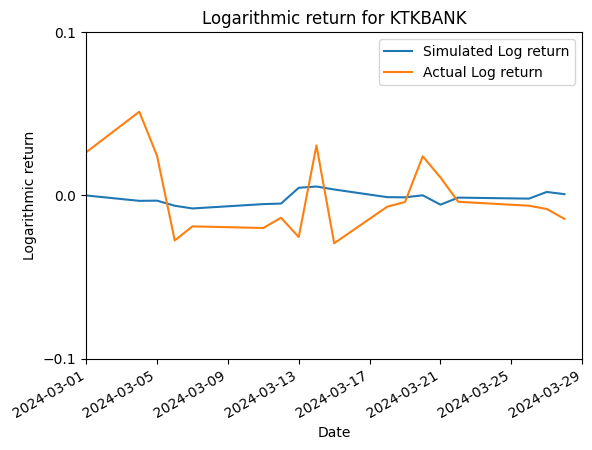

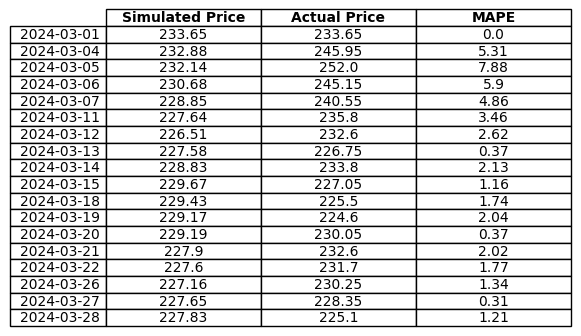

In [82]:
#downloading data
ktk_data = yf.download('KTKBANK.NS', start = '2024-01-01', end = '2024-04-30')
ktk_data.to_csv(f'ktk_data.csv')

#working on data
ktk = pd.read_csv('ktk_data.csv')
ktk['Log_Ret'] = np.log(ktk['Close']/ktk['Close'].shift(1))
ktk['Volatility'] = (ktk['Log_Ret'].rolling(window=10).std())*np.sqrt(252)

ktk['Date'] = pd.to_datetime(ktk['Date'])
ktk.set_index('Date', inplace=True)


#sampling the data
ktk1 = ktk['2024-03-01':'2024-03-31']
# len(ktk1)
ktk1['2024-03-01':'2024-03-31']

#ROI on stocks
returns = [(i+1 - i)/i for i in ktk1['Close']]
#defining variables
T = 1/252  #maturity time
M = len(ktk1)-1 #time steps
r = float(np.mean(returns)) #drift of the data
dt = T/M   #length of time interval
I = 1  #number of paths

S0 = round(float(ktk1['Close'].iloc[0]),2)
S = np.zeros((M + 1, I))  # 2D array to store stock price for each path at each time step
S[0] = S0  # Set initial price for all paths
mean_sigma = round(float(np.mean(ktk1['Volatility']['2024-01-01':'2024-03-01'])),2)
sigma = mean_sigma
#simulation loop
for t in range(1, M + 1):
    #computing volatility on simulated prices
        
    # Generate random numbers for all paths at time t
    Z = npr.standard_normal(I)
    # Update S[t] for all paths at time t
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
#setting comparison table
S = S.flatten()
ktk_comp = pd.DataFrame({
    'Simulated Price': S,
    'Actual Price': ktk1['Close'].values
})
ktk_comp['MAPE'] = (np.absolute(ktk_comp['Actual Price']-ktk_comp['Simulated Price'])/ktk_comp['Actual Price'])*100
ktk_comp = ktk_comp.round(2).set_index(ktk1.index)

#plotting log return of simulated and actual price
ktk_log_comp = pd.DataFrame({
    'Simulated Price' : S,
    'Simulated Log return': np.log(ktk_comp['Simulated Price']/(ktk_comp['Simulated Price'].shift(1))),
    'Actual Price' : ktk1['Close'].values,
    'Actual Log return': ktk1['Log_Ret'].values
}, index = ktk1.index)
ktk_log_comp = ktk_log_comp.fillna(0)

ktk_log_comp[['Simulated Log return','Actual Log return']].plot(yticks = [-0.1,0,0.1], 
                                                                xlabel = 'Date', 
                                                                ylabel = 'Logarithmic return', 
                                                                title = 'Logarithmic return for KTKBANK', 
                                                                style = {'Fontsize':'25','Font':'Times New Roman'}).set_xlim(ktk_log_comp.index[0],'2024-03-29')
plt.savefig('/Users/mpune/OneDrive/Desktop/gbm-sim/ktk_log_ret.png',dpi=500,bbox_inches = 'tight')

## Making the comparison table
# Convert index to just date without time
ktk_comp.index = pd.to_datetime(ktk_comp.index).date

# Rename the index to "Date"
ktk_comp.index.name = 'Date'

# Create a plot for the table
fig, ax = plt.subplots(figsize=(6, 2))  # Adjust size as needed
ax.axis("tight")
ax.axis("off")

# Create a table plot with bold column headers
table_plot = ax.table(cellText=ktk_comp.values,
                      colLabels=ktk_comp.columns,
                      rowLabels=ktk_comp.index,
                      cellLoc='center',
                      loc='center')

# Adjusting cell text properties to make headers bold
for (i, j), cell in table_plot.get_celld().items():
    if i == 0:  # Header row
        cell.set_text_props(weight='bold')  # Make header bold

# Saving as image
plt.savefig('/Users/mpune/OneDrive/Desktop/gbm-sim/ktk_comp.png', dpi=300, bbox_inches='tight')

#### GODREJAGRO

[*********************100%***********************]  1 of 1 completed


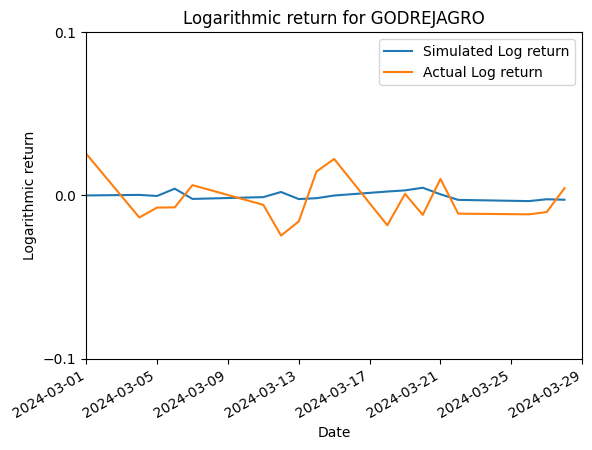

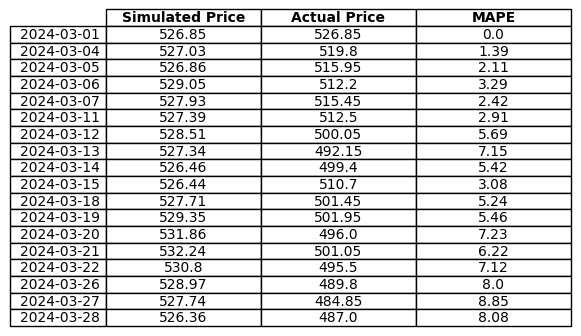

In [83]:
#downloading data
godrejagro_data = yf.download('GODREJAGRO.NS', start = '2024-01-01', end = '2024-04-30')
godrejagro_data.to_csv(f'godrejagro_data.csv')

#working on data
godrejagro = pd.read_csv('godrejagro_data.csv')
godrejagro['Log_Ret'] = np.log(godrejagro['Close']/godrejagro['Close'].shift(1))
godrejagro['Volatility'] = (godrejagro['Log_Ret'].rolling(window=10).std())*np.sqrt(252)

godrejagro['Date'] = pd.to_datetime(godrejagro['Date'])
godrejagro.set_index('Date', inplace=True)


#sampling the data
godrejagro1 = godrejagro['2024-03-01':'2024-03-31']
# len(godrejagro1)
godrejagro1['2024-03-01':'2024-03-31']

#ROI on stocks
returns = [(i+1 - i)/i for i in godrejagro1['Close']]
#defining variables
T = 1/252  #maturity time
M = len(godrejagro1)-1 #time steps
r = float(np.mean(godrejagro['Log_Ret'])) #drift of the data
dt = T/M   #length of time interval
I = 1  #number of paths

S0 = round(float(godrejagro1['Close'].iloc[0]),2)
S = np.zeros((M + 1, I))  # 2D array to store stock price for each path at each time step
S[0] = S0  # Set initial price for all paths
mean_sigma = round(float(np.mean(godrejagro1['Volatility']['2024-01-01':'2024-03-01'])),2)
sigma = mean_sigma
#simulation loop
for t in range(1, M + 1):
    #computing volatility on simulated prices
        
    # Generate random numbers for all paths at time t
    Z = npr.standard_normal(I)
    # Update S[t] for all paths at time t
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
#setting comparison table
S = S.flatten()
godrejagro_comp = pd.DataFrame({
    'Simulated Price': S,
    'Actual Price': godrejagro1['Close'].values
})
godrejagro_comp['MAPE'] = (np.absolute(godrejagro_comp['Actual Price']-godrejagro_comp['Simulated Price'])/godrejagro_comp['Actual Price'])*100
godrejagro_comp = godrejagro_comp.round(2).set_index(godrejagro1.index)

#plotting log return of simulated and actual price
godrejagro_log_comp = pd.DataFrame({
    'Simulated Price' : S,
    'Simulated Log return': np.log(godrejagro_comp['Simulated Price']/(godrejagro_comp['Simulated Price'].shift(1))),
    'Actual Price' : godrejagro1['Close'].values,
    'Actual Log return': godrejagro1['Log_Ret'].values
}, index = godrejagro1.index)
godrejagro_log_comp = godrejagro_log_comp.fillna(0)

godrejagro_log_comp[['Simulated Log return','Actual Log return']].plot(yticks = [-0.1,0,0.1], 
                                                                xlabel = 'Date', 
                                                                ylabel = 'Logarithmic return', 
                                                                title = 'Logarithmic return for GODREJAGRO', 
                                                                style = {'Fontsize':'25','Font':'Times New Roman'}).set_xlim(godrejagro_log_comp.index[0],'2024-03-29')
plt.savefig('/Users/mpune/OneDrive/Desktop/gbm-sim/godrejagro_log_ret.png',dpi=500,bbox_inches = 'tight')

## Making the comparison table
# Convert index to just date without time
godrejagro_comp.index = pd.to_datetime(godrejagro_comp.index).date

# Rename the index to "Date"
godrejagro_comp.index.name = 'Date'

# Create a plot for the table
fig, ax = plt.subplots(figsize=(6, 2))  # Adjust size as needed
ax.axis("tight")
ax.axis("off")

# Create a table plot with bold column headers
table_plot = ax.table(cellText=godrejagro_comp.values,
                      colLabels=godrejagro_comp.columns,
                      rowLabels=godrejagro_comp.index,
                      cellLoc='center',
                      loc='center')

# Adjusting cell text properties to make headers bold
for (i, j), cell in table_plot.get_celld().items():
    if i == 0:  # Header row
        cell.set_text_props(weight='bold')  # Make header bold

# Saving as image
plt.savefig('/Users/mpune/OneDrive/Desktop/gbm-sim/godrejagro_comp.png', dpi=300, bbox_inches='tight')

#### TITAGARH

[*********************100%***********************]  1 of 1 completed


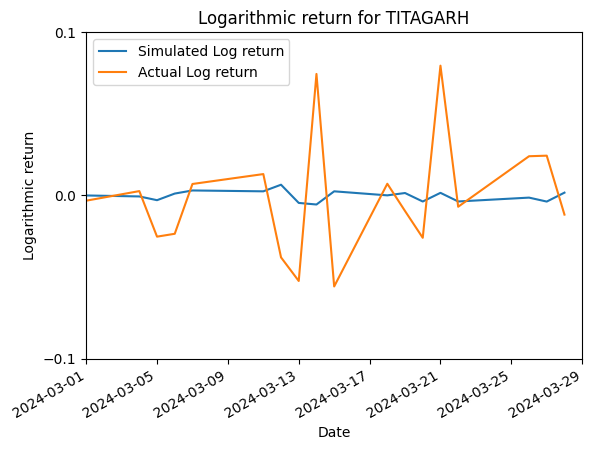

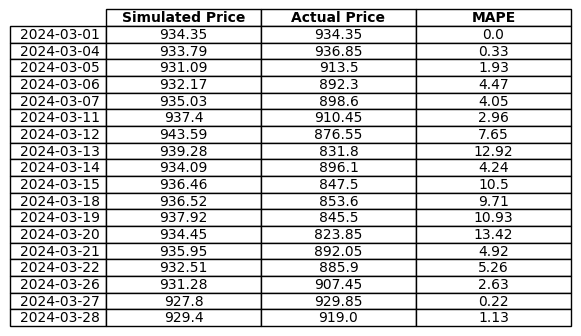

In [84]:
#downloading data
titagarh_data = yf.download('TITAGARH.NS', start = '2024-01-01', end = '2024-04-30')
titagarh_data.to_csv(f'titagarh_data.csv')

#working on data
titagarh = pd.read_csv('titagarh_data.csv')
titagarh['Log_Ret'] = np.log(titagarh['Close']/titagarh['Close'].shift(1))
titagarh['Volatility'] = (titagarh['Log_Ret'].rolling(window=10).std())*np.sqrt(252)

titagarh['Date'] = pd.to_datetime(titagarh['Date'])
titagarh.set_index('Date', inplace=True)


#sampling the data
titagarh1 = titagarh['2024-03-01':'2024-03-31']
# len(titagarh1)
titagarh1['2024-03-01':'2024-03-31']

#ROI on stocks
returns = [(i+1 - i)/i for i in titagarh1['Close']]
#defining variables
T = 1/252  #maturity time
M = len(titagarh1)-1 #time steps
r = float(np.mean(titagarh['Log_Ret'])) #drift of the data
dt = T/M   #length of time interval
I = 1  #number of paths

S0 = round(float(titagarh1['Close'].iloc[0]),2)
S = np.zeros((M + 1, I))  # 2D array to store stock price for each path at each time step
S[0] = S0  # Set initial price for all paths
mean_sigma = round(float(np.mean(titagarh1['Volatility']['2024-01-01':'2024-03-01'])),2)
sigma = mean_sigma
#simulation loop
for t in range(1, M + 1):
    #computing volatility on simulated prices
        
    # Generate random numbers for all paths at time t
    Z = npr.standard_normal(I)
    # Update S[t] for all paths at time t
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
#setting comparison table
S = S.flatten()
titagarh_comp = pd.DataFrame({
    'Simulated Price': S,
    'Actual Price': titagarh1['Close'].values
})
titagarh_comp['MAPE'] = (np.absolute(titagarh_comp['Actual Price']-titagarh_comp['Simulated Price'])/titagarh_comp['Actual Price'])*100
titagarh_comp = titagarh_comp.round(2).set_index(titagarh1.index)

#plotting log return of simulated and actual price
titagarh_log_comp = pd.DataFrame({
    'Simulated Price' : S,
    'Simulated Log return': np.log(titagarh_comp['Simulated Price']/(titagarh_comp['Simulated Price'].shift(1))),
    'Actual Price' : titagarh1['Close'].values,
    'Actual Log return': titagarh1['Log_Ret'].values
}, index = titagarh1.index)
titagarh_log_comp = titagarh_log_comp.fillna(0)

titagarh_log_comp[['Simulated Log return','Actual Log return']].plot(yticks = [-0.1,0,0.1], 
                                                                xlabel = 'Date', 
                                                                ylabel = 'Logarithmic return', 
                                                                title = 'Logarithmic return for TITAGARH', 
                                                                style = {'Fontsize':'25','Font':'Times New Roman'}).set_xlim(titagarh_log_comp.index[0],'2024-03-29')
plt.savefig('/Users/mpune/OneDrive/Desktop/gbm-sim/titagarh_log_ret.png',dpi=500,bbox_inches = 'tight')

## Making the comparison table
# Convert index to just date without time
titagarh_comp.index = pd.to_datetime(titagarh_comp.index).date

# Rename the index to "Date"
titagarh_comp.index.name = 'Date'

# Create a plot for the table
fig, ax = plt.subplots(figsize=(6, 2))  # Adjust size as needed
ax.axis("tight")
ax.axis("off")

# Create a table plot with bold column headers
table_plot = ax.table(cellText=titagarh_comp.values,
                      colLabels=titagarh_comp.columns,
                      rowLabels=titagarh_comp.index,
                      cellLoc='center',
                      loc='center')

# Adjusting cell text properties to make headers bold
for (i, j), cell in table_plot.get_celld().items():
    if i == 0:  # Header row
        cell.set_text_props(weight='bold')  # Make header bold

# Saving as image
plt.savefig('/Users/mpune/OneDrive/Desktop/gbm-sim/titagarh_comp.png', dpi=300, bbox_inches='tight')

#### INDIACEM

[*********************100%***********************]  1 of 1 completed


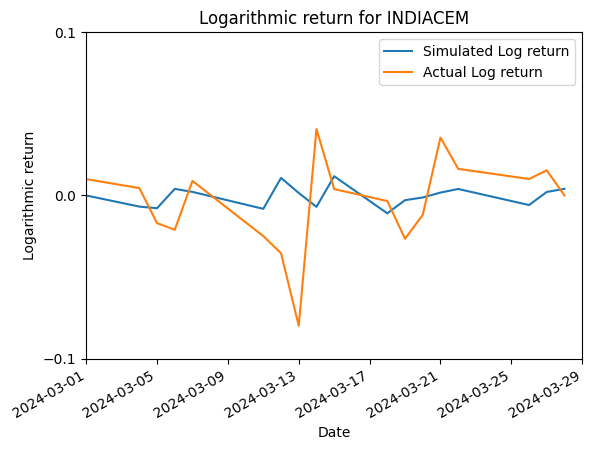

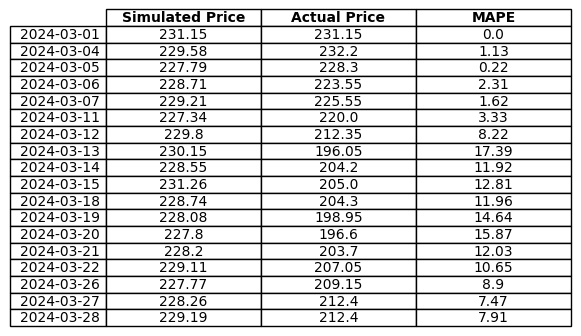

In [85]:
#downloading data
INDIACEM_data = yf.download('INDIACEM.NS', start = '2024-01-01', end = '2024-04-30')
INDIACEM_data.to_csv(f'INDIACEM_data.csv')

#working on data
INDIACEM = pd.read_csv('INDIACEM_data.csv')
INDIACEM['Log_Ret'] = np.log(INDIACEM['Close']/INDIACEM['Close'].shift(1))
INDIACEM['Volatility'] = (INDIACEM['Log_Ret'].rolling(window=10).std())*np.sqrt(252)

INDIACEM['Date'] = pd.to_datetime(INDIACEM['Date'])
INDIACEM.set_index('Date', inplace=True)


#sampling the data
INDIACEM1 = INDIACEM['2024-03-01':'2024-03-31']
# len(INDIACEM1)
INDIACEM1['2024-03-01':'2024-03-31']

#ROI on stocks
returns = [(i+1 - i)/i for i in INDIACEM1['Close']]
#defining variables
T = 1/252  #maturity time
M = len(INDIACEM1)-1 #time steps
r = float(np.mean(INDIACEM['Log_Ret'])) #drift of the data
dt = T/M   #length of time interval
I = 1  #number of paths

S0 = round(float(INDIACEM1['Close'].iloc[0]),2)
S = np.zeros((M + 1, I))  # 2D array to store stock price for each path at each time step
S[0] = S0  # Set initial price for all paths
mean_sigma = round(float(np.mean(INDIACEM1['Volatility']['2024-01-01':'2024-03-01'])),2)
sigma = mean_sigma
#simulation loop
for t in range(1, M + 1):
    #computing volatility on simulated prices
        
    # Generate random numbers for all paths at time t
    Z = npr.standard_normal(I)
    # Update S[t] for all paths at time t
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
#setting comparison table
S = S.flatten()
INDIACEM_comp = pd.DataFrame({
    'Simulated Price': S,
    'Actual Price': INDIACEM1['Close'].values
})
INDIACEM_comp['MAPE'] = (np.absolute(INDIACEM_comp['Actual Price']-INDIACEM_comp['Simulated Price'])/INDIACEM_comp['Actual Price'])*100
INDIACEM_comp = INDIACEM_comp.round(2).set_index(INDIACEM1.index)

#plotting log return of simulated and actual price
INDIACEM_log_comp = pd.DataFrame({
    'Simulated Price' : S,
    'Simulated Log return': np.log(INDIACEM_comp['Simulated Price']/(INDIACEM_comp['Simulated Price'].shift(1))),
    'Actual Price' : INDIACEM1['Close'].values,
    'Actual Log return': INDIACEM1['Log_Ret'].values
}, index = INDIACEM1.index)
INDIACEM_log_comp = INDIACEM_log_comp.fillna(0)

INDIACEM_log_comp[['Simulated Log return','Actual Log return']].plot(yticks = [-0.1,0,0.1], 
                                                                xlabel = 'Date', 
                                                                ylabel = 'Logarithmic return', 
                                                                title = 'Logarithmic return for INDIACEM', 
                                                                style = {'Fontsize':'25','Font':'Times New Roman'}).set_xlim(INDIACEM_log_comp.index[0],'2024-03-29')
plt.savefig('/Users/mpune/OneDrive/Desktop/gbm-sim/INDIACEM_log_ret.png',dpi=500,bbox_inches = 'tight')

## Making the comparison table
# Convert index to just date without time
INDIACEM_comp.index = pd.to_datetime(INDIACEM_comp.index).date

# Rename the index to "Date"
INDIACEM_comp.index.name = 'Date'

# Create a plot for the table
fig, ax = plt.subplots(figsize=(6, 2))  # Adjust size as needed
ax.axis("tight")
ax.axis("off")

# Create a table plot with bold column headers
table_plot = ax.table(cellText=INDIACEM_comp.values,
                      colLabels=INDIACEM_comp.columns,
                      rowLabels=INDIACEM_comp.index,
                      cellLoc='center',
                      loc='center')

# Adjusting cell text properties to make headers bold
for (i, j), cell in table_plot.get_celld().items():
    if i == 0:  # Header row
        cell.set_text_props(weight='bold')  # Make header bold

# Saving as image
plt.savefig('/Users/mpune/OneDrive/Desktop/gbm-sim/INDIACEM_comp.png', dpi=300, bbox_inches='tight')

#### common table

In [86]:
merged_smallcap = pd.concat([ktk_comp, godrejagro_comp, titagarh_comp, INDIACEM_comp], axis=1, keys=['KTKBANK', 'GODREJAGRO', 'TITAGARH', 'INDIACEM'])
#making a table
merged_smallcap.to_excel('merged_smallcap.xlsx')


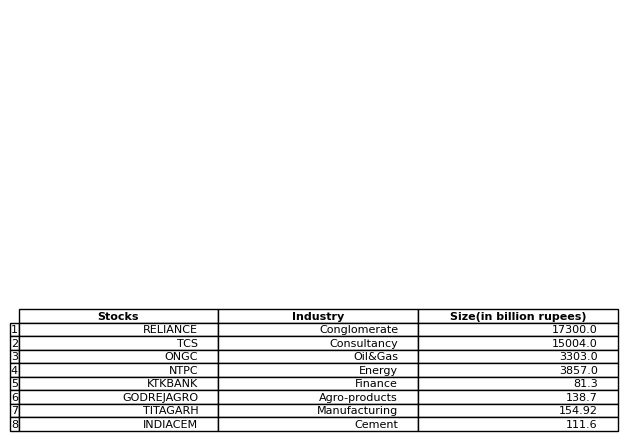

In [87]:
df = pd.DataFrame({'Stocks':['RELIANCE','TCS','ONGC','NTPC','KTKBANK','GODREJAGRO','TITAGARH','INDIACEM'],
                   'Industry':['Conglomerate','Consultancy','Oil&Gas','Energy','Finance','Agro-products','Manufacturing','Cement'],
                   'Size(in billion rupees)':[17300,15004,3303,3857,81.3,138.7,154.92,111.6]
                  },index = np.arange(1,9))
from pandas.plotting import table
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table_plot = table(ax, df) 
for (i, j), cell in table_plot.get_celld().items():
    if i == 0:  # Header row
        cell.set_text_props(weight='bold',fontsize=20)
plt.tight_layout()
plt.savefig('/Users/mpune/OneDrive/Desktop/gbm-sim/mytable.png',dpi=500, bbox_inches='tight')

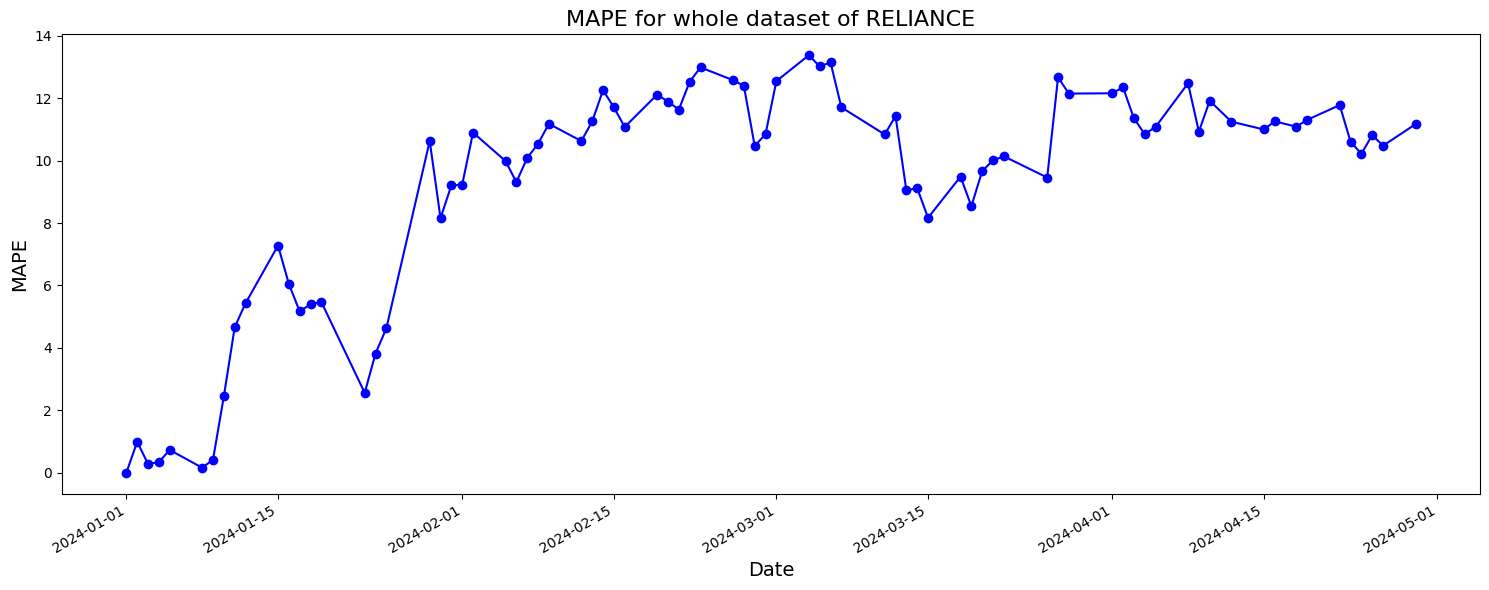

In [88]:
#ROI on stocks
returns = [(i+1 - i)/i for i in rel['Close']]
#defining variables
T = 1/252  #maturity time
M = len(rel)-1 #time steps
r = float(np.mean(rel['Log_Ret'])) #drift of the data
dt = T/M   #length of time interval
I = 1  #number of paths

S0 = round(float(rel['Close'].iloc[0]),2)
S = np.zeros((M + 1, I))  # 2D array to store stock price for each path at each time step
S[0] = S0  # Set initial price for all paths
mean_sigma = round(float(np.mean(rel['Volatility'][rel.index[0]:rel.index[-1]])),2)
sigma = mean_sigma
#simulation loop
for t in range(1, M + 1):
    #computing volatility on simulated prices
        
    # Generate random numbers for all paths at time t
    Z = npr.standard_normal(I)
    # Update S[t] for all paths at time t
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)

#making comparison table that includes MAPE
S = S.flatten()
rel_comp = pd.DataFrame({
    'Simulated Price': S,
    'Actual Price': rel['Close'].values
})

#showing how MAPE varies with time
rel_comp['MAPE'] = (np.absolute(rel_comp['Actual Price']-rel_comp['Simulated Price'])/rel_comp['Actual Price'])*100
rel_comp = rel_comp.round(2).set_index(rel.index)

ax = rel_comp['MAPE'].plot(figsize=(15,6),color='blue',marker='o')
ax.set_xlabel('Date',fontsize=14)
ax.set_ylabel('MAPE', fontsize =14)
ax.set_title("MAPE for whole dataset of RELIANCE",fontsize=16)
plt.tight_layout()
plt.savefig('/Users/mpune/OneDrive/Desktop/gbm-sim/rel-MAPE.png',dpi=500)